# Рекуррентные нейронных сетей

In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv("C:/Users/Zhastay/Downloads/jena_climate_2009_2016/data330k580kstep20.csv")

In [3]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [4]:
def create_time_steps(length):
  return list(range(-length, 0))
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [5]:
TRAIN_SPLIT = 10000
tf.random.set_seed(13)

In [6]:
uni_data = df['value']
uni_data.index = df['id']
uni_data = uni_data.values

In [7]:
uni_data = tf.keras.utils.normalize(uni_data)[0]

In [8]:
univariate_past_history = 20
univariate_future_target = 3

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                           univariate_past_history,
                                           univariate_future_target)

In [9]:
x_train_uni

array([[[ 0.02566353],
        [-0.02566353],
        [ 0.00855451],
        ...,
        [ 0.        ],
        [ 0.00855451],
        [ 0.        ]],

       [[-0.02566353],
        [ 0.00855451],
        [-0.00855451],
        ...,
        [ 0.00855451],
        [ 0.        ],
        [-0.00855451]],

       [[ 0.00855451],
        [-0.00855451],
        [ 0.        ],
        ...,
        [ 0.        ],
        [-0.00855451],
        [ 0.        ]],

       ...,

       [[ 0.00855451],
        [-0.01710902],
        [ 0.01710902],
        ...,
        [ 0.00855451],
        [ 0.        ],
        [ 0.        ]],

       [[-0.01710902],
        [ 0.01710902],
        [-0.00855451],
        ...,
        [ 0.        ],
        [ 0.        ],
        [-0.00855451]],

       [[ 0.01710902],
        [-0.00855451],
        [ 0.00855451],
        ...,
        [ 0.        ],
        [-0.00855451],
        [ 0.00855451]]])

In [19]:
Validationlosses = []
Trainlosses = []

for i in range(0, 100):
    print("\n" + str(i) + "...\n")
    univariate_past_history = 20 + i * 10
    univariate_future_target = 3

    x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
    x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                           univariate_past_history,
                                           univariate_future_target)

    BATCH_SIZE = 256
    BUFFER_SIZE = 10000

    train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
    train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

    val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
    val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

    simple_lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
        tf.keras.layers.Dense(1)
    ])

    simple_lstm_model.compile(optimizer='adam', loss='mae')

    EVALUATION_INTERVAL = 200
    EPOCHS = 10

    single_step_history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                          steps_per_epoch=EVALUATION_INTERVAL,
                          validation_data=val_univariate, validation_steps=50)
    print(univariate_past_history)

    Validationlosses.append(single_step_history.history['val_loss'])
    Trainlosses.append(single_step_history.history['loss'])
    


0...

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 8/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 9/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 10/10
200/200 [============================

200/200 [==============================] - 5s 23ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 9/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 10/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0065 - val_loss: 0.0070
90

8...

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 6s 32ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 2/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 3/10
200/200 [==============================] - 5s 27ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 4/10
200/200 [==============================] - 5s 27ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 5/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 6/10
200/200 [==============================] - 5s 27ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 7/10
200/200 [============================

Epoch 5/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 6/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 7/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 8/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 9/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 10/10
200/200 [==============================] - 9s 43ms/step - loss: 0.0065 - val_loss: 0.0072
170

16...

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 11s 53ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 2/10
200/200 [==============================] - 10s 48ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 3/10
200/200 [==============================] - 10s 48ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 4/10
200/200 [============

200/200 [==============================] - 14s 71ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 2/10
200/200 [==============================] - 13s 66ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 3/10
200/200 [==============================] - 13s 66ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 4/10
200/200 [==============================] - 13s 65ms/step - loss: 0.0066 - val_loss: 0.0070- ETA: 0s - 
Epoch 5/10
200/200 [==============================] - 13s 65ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 6/10
200/200 [==============================] - 13s 65ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 7/10
200/200 [==============================] - 13s 65ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 8/10
200/200 [==============================] - 13s 65ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 9/10
200/200 [==============================] - 13s 67ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 10/10
200/200 [==============================] - 13s 66ms/step - loss: 0.00

200/200 [==============================] - 26s 132ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 3/10
200/200 [==============================] - 26s 130ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 4/10
200/200 [==============================] - 26s 128ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 5/10
200/200 [==============================] - 25s 124ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 6/10
200/200 [==============================] - 25s 124ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 7/10
200/200 [==============================] - 25s 123ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 8/10
200/200 [==============================] - 26s 129ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 9/10
200/200 [==============================] - 26s 131ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 10/10
200/200 [==============================] - 26s 128ms/step - loss: 0.0065 - val_loss: 0.0070
400

39...

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [========

Epoch 8/10
200/200 [==============================] - 30s 152ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 9/10
200/200 [==============================] - 30s 151ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 10/10
200/200 [==============================] - 30s 150ms/step - loss: 0.0065 - val_loss: 0.0070
470

46...

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 35s 174ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 2/10
200/200 [==============================] - 31s 157ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 3/10
200/200 [==============================] - 31s 157ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 4/10
200/200 [==============================] - 30s 150ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 5/10
200/200 [==============================] - 30s 149ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 6/10
200/200 [==============================] - 30s 150ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 7/10
200/20

Epoch 9/10
200/200 [==============================] - 46s 232ms/step - loss: 0.0065 - val_loss: 0.0070
Epoch 10/10
200/200 [==============================] - 48s 239ms/step - loss: 0.0065 - val_loss: 0.0070
620

61...

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 49s 243ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 2/10
200/200 [==============================] - 46s 231ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 3/10
200/200 [==============================] - 46s 229ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 4/10
200/200 [==============================] - 46s 228ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 5/10
200/200 [==============================] - 45s 227ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 6/10
200/200 [==============================] - 45s 227ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 7/10
200/200 [==============================] - 45s 227ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 8/10
200/20

Epoch 10/10
200/200 [==============================] - 56s 279ms/step - loss: 0.0065 - val_loss: 0.0069
770

76...

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 57s 283ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 2/10
200/200 [==============================] - 55s 276ms/step - loss: 0.0067 - val_loss: 0.0072
Epoch 3/10
200/200 [==============================] - 55s 277ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 4/10
200/200 [==============================] - 55s 276ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 5/10
200/200 [==============================] - 55s 275ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 6/10
200/200 [==============================] - 55s 276ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 7/10
200/200 [==============================] - 55s 277ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 8/10
200/200 [==============================] - 55s 276ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 9/10
200/20

920

91...

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 88s 438ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 2/10
200/200 [==============================] - 82s 408ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 3/10
200/200 [==============================] - 82s 408ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 4/10
200/200 [==============================] - 84s 418ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 5/10
200/200 [==============================] - 83s 417ms/step - loss: 0.0065 - val_loss: 0.0073
Epoch 6/10
200/200 [==============================] - 83s 417ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 7/10
200/200 [==============================] - 94s 469ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 8/10
200/200 [==============================] - 92s 460ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 9/10
200/200 [==============================] - 88s 441ms/step - loss: 0.0065 - val_loss: 0.0072
Epoch 10/10
200/20

In [20]:
Trainlosses
Validationlosses

[[0.00706253401003778,
  0.007030383218079805,
  0.0070627151057124134,
  0.007039623148739338,
  0.00702971494756639,
  0.007069284748286009,
  0.007062582345679402,
  0.007036142982542515,
  0.007041995739564299,
  0.007025442738085985],
 [0.0070855669677257534,
  0.006990153854712844,
  0.007004353264346719,
  0.0070106948260217905,
  0.007053444487974047,
  0.007061485340818763,
  0.00705568389967084,
  0.007026216480880976,
  0.006990095507353545,
  0.007018036628141999],
 [0.007108361134305597,
  0.007187262317165733,
  0.007073372695595026,
  0.007053673919290304,
  0.007018341450020671,
  0.007059588981792331,
  0.00703296116553247,
  0.007153924508020282,
  0.0070314849726855755,
  0.006992276990786195],
 [0.007021591160446405,
  0.007012024382129311,
  0.006999237090349197,
  0.007179311290383339,
  0.007013172889128327,
  0.007006598729640245,
  0.007030835514888168,
  0.007154838880524039,
  0.007083669863641262,
  0.0069955435115844015],
 [0.006982331303879619,
  0.0070536

Получаем только первого

In [21]:
values = []
for i in range(0, 100):
    values.append(Validationlosses[i][1])

values

[0.00706253401003778,
 0.0070855669677257534,
 0.007108361134305597,
 0.007021591160446405,
 0.006982331303879619,
 0.007010269211605191,
 0.007193640433251857,
 0.007052818778902292,
 0.007128582708537579,
 0.007137132342904806,
 0.007277408195659518,
 0.007180483685806394,
 0.007140830997377634,
 0.007159608276560902,
 0.007318150717765093,
 0.007388052111491561,
 0.00715328841470182,
 0.006836984260007739,
 0.00718489695340395,
 0.007075081123039126,
 0.007015344509854912,
 0.007082770559936762,
 0.0069772862084209915,
 0.007128984862938523,
 0.0070416000764817,
 0.007135077891871333,
 0.007127548614516854,
 0.007090862160548567,
 0.00714478574693203,
 0.007345541575923562,
 0.007385934330523014,
 0.007037459779530764,
 0.007083788616582752,
 0.007163923745974898,
 0.007162900352850557,
 0.007029152186587453,
 0.007029054891318083,
 0.007137653781101107,
 0.007107359077781439,
 0.007126261908560991,
 0.00751092167571187,
 0.007294509820640087,
 0.007360659940168261,
 0.0069781316537

# LSTM-модель для прогнозирование

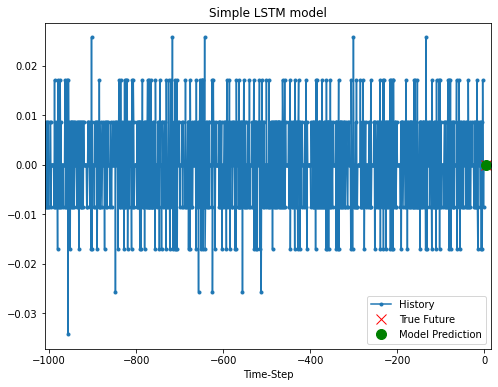

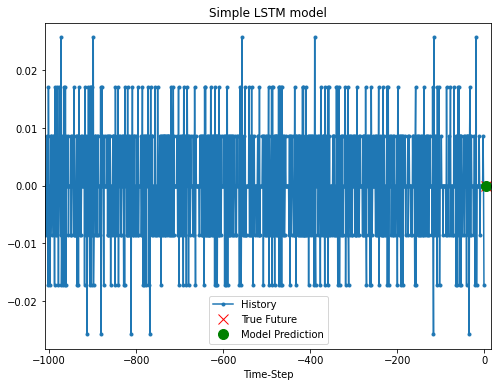

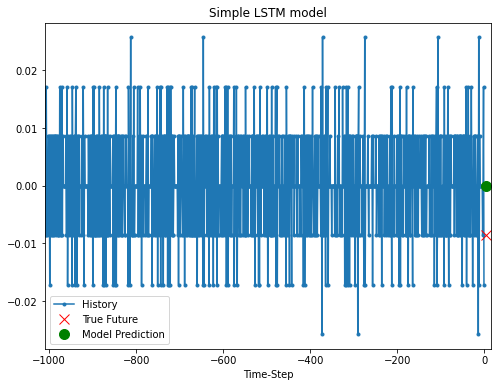

In [23]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 3, 'Simple LSTM model')
  plot.show()

In [24]:
def plot_train_history(history, title):
  loss = history

  epochs = []
  for i in range(20, 1020, 10):
    epochs.append(i)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='loss')
  plt.title(title)
  plt.legend()

  plt.show()

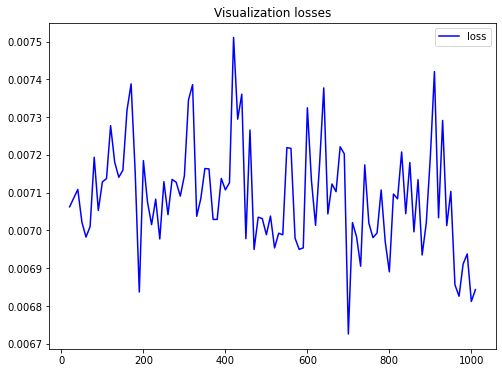

In [25]:
plot_train_history(values,
                   'Visualization losses')